<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.551373,-4.092035,37.459338,41.331478,-3.872140
1,0.0,1.0,83.011771,0.133860,93.145631,93.180133,-0.034502
2,0.0,2.0,81.605137,-1.503821,90.101316,91.762886,-1.661570
3,0.0,3.0,84.581824,1.920253,96.502077,94.762032,1.740045
4,0.0,4.0,30.892428,0.136132,41.028560,40.667561,0.360999
...,...,...,...,...,...,...,...
249995,999.0,245.0,43.395070,2.020097,55.415168,53.430884,1.984283
249996,999.0,246.0,55.303502,-1.277740,64.025762,65.402425,-1.376663
249997,999.0,247.0,31.534172,0.997080,42.531253,41.507129,1.024123
249998,999.0,248.0,54.435447,-1.025854,63.409593,64.529770,-1.120177


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.551373,-4.092035,37.459338,41.331478,-3.872140
1,0.0,1.0,83.011771,0.133860,93.145631,93.180133,-0.034502
2,0.0,2.0,81.605137,-1.503821,90.101316,91.762886,-1.661570
3,0.0,3.0,84.581824,1.920253,96.502077,94.762032,1.740045
4,0.0,4.0,30.892428,0.136132,41.028560,40.667561,0.360999
...,...,...,...,...,...,...,...
249995,999.0,245.0,43.395070,2.020097,55.415168,53.430884,1.984283
249996,999.0,246.0,55.303502,-1.277740,64.025762,65.402425,-1.376663
249997,999.0,247.0,31.534172,0.997080,42.531253,41.507129,1.024123
249998,999.0,248.0,54.435447,-1.025854,63.409593,64.529770,-1.120177


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

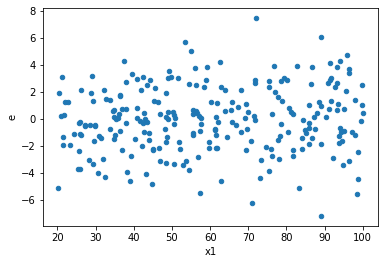

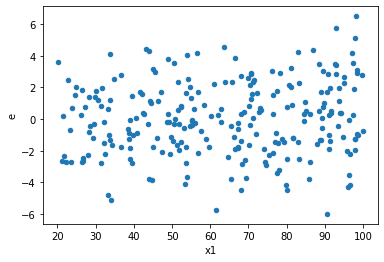

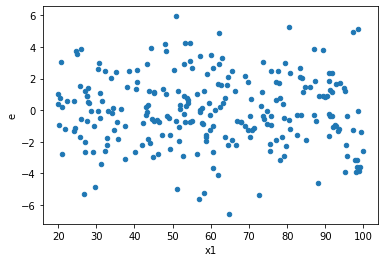

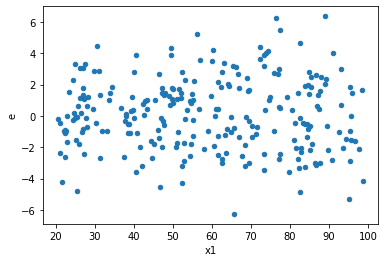

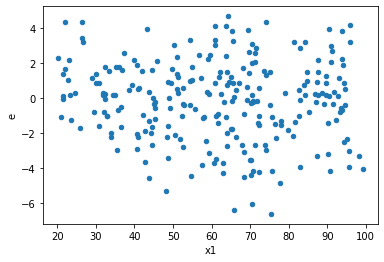

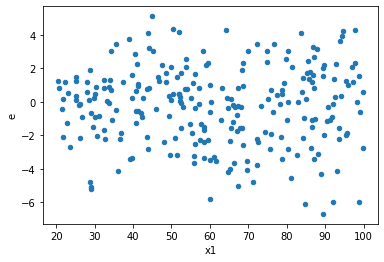

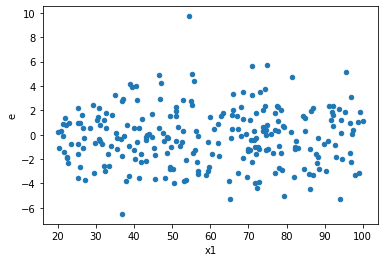

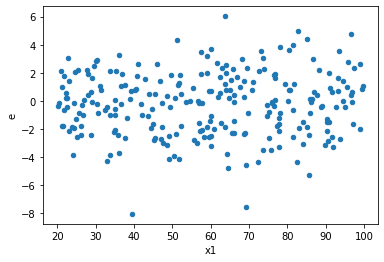

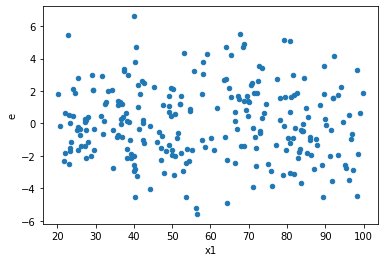

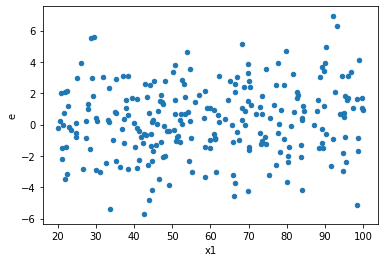

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,111.0,137.0,434.8011046236479,777.482613719379,3.9171270686815127,5.675055574594007,1.4487800561711686,0.039175496372344965,0.9804122518138275,0.019587748186172482,Reject005=0 : Heteroscedasticity
9.0,133.0,115.0,536.2616425800057,563.8699541817957,4.032042425413577,4.90321699288518,1.2160628474493902,0.28178225967115833,0.8591088701644208,0.14089112983557917,Reject005=1 : Homoscedasticity
10.0,142.0,106.0,734.4395550548163,707.794707281134,5.172109542639552,6.677308559255981,1.291022261653078,0.16603833606360863,0.9169808319681957,0.08301916803180431,Reject005=1 : Homoscedasticity
12.0,135.0,113.0,644.9006341577302,587.0185687887584,4.777041734501705,5.19485459105096,1.0874626766460178,0.6468938866471103,0.6765530566764448,0.32344694332355517,Reject005=1 : Homoscedasticity
13.0,124.0,124.0,482.84810294243056,785.9654717737931,3.8939363140518592,6.3384312239822025,1.6277696173686798,0.007059471978749565,0.9964702640106252,0.0035297359893747826,Reject005=0 : Heteroscedasticity
14.0,103.0,145.0,375.6705340134967,901.1117671462108,3.6472867379951137,6.214563911353178,1.7038868500833244,0.003119759398787947,0.998440120300606,0.0015598796993939734,Reject005=0 : Heteroscedasticity
16.0,126.0,122.0,666.0823945364726,686.9283334465131,5.286368210606926,5.630560110217321,1.065109331377974,0.7267949260757136,0.6366025369621432,0.3633974630378568,Reject005=1 : Homoscedasticity
19.0,130.0,118.0,608.2602079121939,628.9837731829791,4.678924676247646,5.330370959177789,1.1392299145650242,0.47180588423541603,0.764097057882292,0.23590294211770801,Reject005=1 : Homoscedasticity
22.0,124.0,124.0,648.6513139179333,706.2640201082374,5.23105898320914,5.695677581518044,1.0888192237556975,0.6363865584731372,0.6818067207634314,0.3181932792365686,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,111.0,137.0,434.8011046236479,777.482613719379,3.9171270686815127,5.675055574594007,1.4487800561711686,0.039175496372344965,Reject005=0 : Heteroscedasticity
1.0,134.0,114.0,712.1287958628643,591.7358891414387,5.314393998976599,5.190665694223147,0.9767182665084149,0.8923286408911442,Reject005=1 : Homoscedasticity
2.0,125.0,123.0,586.4910098418461,485.4416711360938,4.691928078734769,3.946680253138974,0.8411638428616409,0.33645761820155934,Reject005=1 : Homoscedasticity
3.0,114.0,134.0,556.9163604887829,581.2858502038478,4.885231232357745,4.337954105998864,0.8879731377434206,0.5144321211240049,Reject005=1 : Homoscedasticity
4.0,129.0,119.0,613.8449789687828,487.89557089511396,4.7584882090603315,4.09996278063121,0.8616103687773639,0.40662320163069393,Reject005=1 : Homoscedasticity
5.0,144.0,104.0,964.6323871932836,392.4397925715567,6.6988360221755805,3.773459543957276,0.5633007781450022,0.0014499566618631087,Reject005=0 : Heteroscedasticity
6.0,123.0,125.0,631.1667516831001,508.417660363314,5.131437005553659,4.067341282906512,0.7926320207194406,0.1974157894699092,Reject005=1 : Homoscedasticity
7.0,110.0,138.0,575.439810710055,676.6142947113834,5.231271006455045,4.903002135589735,0.9372487354487565,0.7259505809722958,Reject005=1 : Homoscedasticity
8.0,114.0,134.0,612.2648248979074,689.7187038476103,5.370744078051819,5.14715450632545,0.958368976723338,0.81769228488137,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      646
Reject005=0 : Heteroscedasticity    354
Name: Result_test, dtype: int64